In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Function to compute Stochastic gradient descent on Linear regression with L2 regularization
def sgd(X_train, y_train, alpha, epochs, lr):
    '''The parameters of the sgd function are
    X_train - Data set of features 
    y_train - Target values
    alpha - regularization tuning parameter
    epochs - number of iterations
    lr - learning rate
    The function returns lists of weights and Sum Squared Errors
    '''
    cost = []
    # Initialize weights as 0
    w = np.zeros(X_train.shape[1])
    for i in range(epochs):
        # Compute the predicted values
        y_pred = np.dot(X_train, w)
        
        # Compute error 
        errors = (y_pred - y_train)
        
        # Update the weights according to the formula weights = weights - learning_rate * X * (predicted_y - true_y)
        # Adding the L2 regularization term 
        w -= lr * (2*(X_train.T.dot(errors)/X_train.shape[0]) + alpha*w*w)
        
        # Append the values of SSE of each epoch to cost
        cost.append(np.mean(np.square(errors)) + alpha*((w**2).sum()))
        
        # Break if there is no significant improvement
        if i > 2:
            if abs(cost[-1] - cost[-2]) <= 0.01: break
    return w,cost

In [3]:
# Linear Regression with L2-Regularization on sample Boston Housing dataset from sklearn
def main():
    # Load the sample Boston housing data
    boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    # Splitting into test and train datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
    # Standardizing the data
    train_min = X_train.min(0)
    train_max = X_train.max(0)
    X_train = (X_train - train_min)/(train_max - train_min)
    X_test = (X_test - train_min)/(train_max - train_min)

    # Append a column of 1s to include intercept in the computation
    X_train = np.insert(X_train, 0, 1, axis=1)
    
    # Calling the sgd function
    weights, SSE = sgd(X_train, y_train, alpha = 0.001 ,epochs = 1000, lr = 0.025)
    
    # Plot SSE vs Epochs
    plt.plot(SSE, color = "green", lw = 2)
    plt.xlabel("Epochs")
    plt.ylabel("SSE")
    plt.title("SSE vs Epochs")
    plt.show()
    
    # Computing predictions of test data
    test_predictions = [weights[0]+round(np.dot(weights[1:],x),3) for x in X_test]
    
    # Print the test data actual vs predicted results
    print('Sample\tTruth\tPredicted')
    for i in range(len(test_predictions)):
        print('{}:\t{:.1f}\t{:.1f}'.format(i, y_test[i], test_predictions[i]))
        

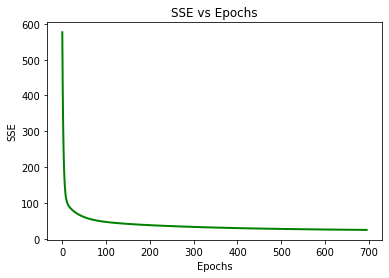

Sample	Truth	Predicted
0:	27.5	12.4
1:	21.6	24.7
2:	17.7	20.8
3:	24.3	24.8
4:	22.2	24.3
5:	50.0	22.3
6:	18.6	23.3
7:	10.2	17.8
8:	11.3	15.0
9:	25.3	23.6
10:	14.5	18.1
11:	28.6	26.4
12:	14.9	18.2
13:	34.6	33.5
14:	22.6	20.3
15:	10.9	11.3
16:	13.6	15.9
17:	22.0	26.9
18:	20.3	20.1
19:	21.7	22.8
20:	24.3	22.8
21:	38.7	33.2
22:	27.0	27.5
23:	16.7	19.4
24:	22.0	21.7
25:	14.9	17.2
26:	10.8	12.6
27:	22.2	25.0
28:	23.6	29.3
29:	23.0	23.8
30:	21.5	22.8
31:	13.8	8.8
32:	50.0	27.8
33:	43.8	31.5
34:	22.4	21.6
35:	28.2	29.1
36:	30.1	32.0
37:	20.4	20.5
38:	24.6	26.8
39:	50.0	35.6
40:	46.0	35.9
41:	16.5	17.2
42:	18.8	18.9
43:	23.3	23.9
44:	8.8	5.5
45:	13.5	15.8
46:	22.5	21.7
47:	33.2	32.4
48:	23.8	22.8
49:	21.7	22.7
50:	29.4	26.9
51:	21.6	25.5
52:	16.2	16.6
53:	22.7	23.1
54:	18.5	23.5
55:	18.9	24.1
56:	31.6	29.1
57:	27.5	24.3
58:	22.2	21.0
59:	12.5	19.6
60:	11.7	13.8
61:	18.8	20.6
62:	20.6	23.1
63:	20.8	21.4
64:	24.3	22.9
65:	18.6	16.0
66:	15.6	19.5
67:	17.4	19.9
68:	29.8	23.1
69:	23.1	21.1
70:	30.1	2

In [4]:
if __name__ == '__main__':
    main()